In [117]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
M = 6 # Order of poly is M-1
from random import randint as rand
with open("gaussian.csv", 'r') as f:
    data = list(csv.reader(f,delimiter = ','))
data = np.array(data)
data = np.array([[float(d[0]),float(d[1])] for d in data])
x = np.array([d[0] for d in data], dtype = 'float')
t = np.array([d[1] for d in data], dtype= 'float')
phi = np.array([[pow(xv,i) for i in range(M)] for xv in x])
N = t.size

In [231]:
def batch_gd(phix, alpha, tx, w, iters, batch_size):
    M = phix.shape[1]       # Number of features
    N = batch_size          # Number of data points
    for i in range(iters):
        phis,ts = make_batches(phix,tx,batch_size)
        with warnings.catch_warnings():
            warnings.filterwarnings('error')
            try:
                for i in range(len(phis)):
                    phii = phis[i]
                    ti = ts[i]
                    h = phii.dot(w)
                    # We find the normalised gradient
                    gd= np.zeros(M,dtype= 'float')
                    for j in range(M):
                        gd[j] = sum((h-ti) * phii.T[j])/N
                        
                    # norm = sum(np.square(gd))
                    # gd = gd/norm
                    # print(sum(np.square(gd)))

                    w = w - (alpha * gd)

                    h = phii.dot(w)
            except RuntimeWarning as e:
                return e
        with warnings.catch_warnings():
            warnings.filterwarnings('error')
            try:
                cost = (1/phix.shape[0])*0.5*sum(np.square(phix.dot(w)-tx))
            except RuntimeWarning as e:
                return e
    return w,cost

[ 7.01512838 -0.07366058  0.10275163  0.41423331 -0.86491064  0.39761107] 2.469253161686843e-05
[ 7.01485809 -0.0740549   0.10354828  0.41657132 -0.8727268   0.40200596] 2.4581964212144004e-05
[ 7.00963615 -0.06281031  0.06034391  0.34119153 -0.70251454  0.31797505] 0.00018731157837827568


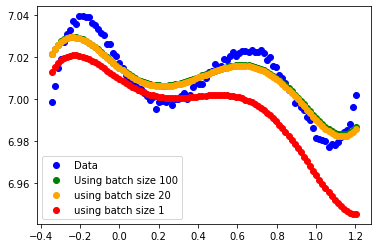

In [228]:
out1 = batch_gd(phi,0.2884375,t,np.ones(phi.shape[1],dtype = 'float'),100000,100)
out2 = batch_gd(phi,0.2884375,t,np.ones(phi.shape[1],dtype = 'float'),100000,20)
out3 = batch_gd(phi,0.2884375,t,np.ones(phi.shape[1],dtype = 'float'),100000,1)

if(isinstance(out1,RuntimeWarning)):
    print("Overflow!! Decrease the learning rate!")
else:
    w1,cost1 = out1
    w2,cost2 = out2
    w3,cost3 = out3
    plt.scatter(x,t,c='blue')
    plt.scatter(x,phi.dot(w1),c='green')
    plt.scatter(x,phi.dot(w2),c='orange')
    plt.scatter(x,phi.dot(w3),c='red')
    plt.legend(['Data','Using batch size 100','using batch size 20','using batch size 1'],loc='lower left')
    print(w1,cost1)
    print(w2,cost2)
    print(w3,cost3)

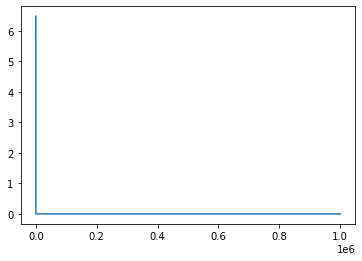

In [19]:
plt.plot(range(len(costs)),costs)

In [17]:
def MPPI(phi, t):
    return (np.linalg.inv((phi.T).dot(phi)).dot(phi.T)).dot(t)

[ 7.01773396 -0.15137568  0.11437193  1.22414225 -2.22411984  1.00319593]


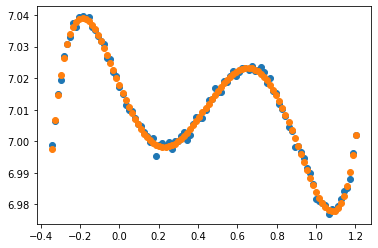

In [18]:
w = MPPI(phi,t)
# w = np.array([0.01402913, 0.02349636, 0.04160696, 0.07611964, 0.14208624, 0.26878028,
#  0.51327819, 0.98710056, 1.90850006, 3.70511957])
plt.scatter(x,t)
plt.scatter(x,(phi).dot(w))
print(w)

In [145]:
def make_batches(phi,t,bs):
    N = phi.shape[0]
    newphi = np.copy(phi)
    newphi = np.concatenate((newphi,np.array([t]).T),axis = 1)
    np.random.shuffle(newphi)
    sz = math.floor(N/bs)
    newphi = newphi[0:sz*bs]
    N = phi.shape[0]
    newphi = np.array(np.split(newphi,sz))
    phis = []
    ts = []
    for ph in newphi:
        ts.append(ph.T[-1])
        phis.append((ph.T[0:-1]).T)
    return phis,ts

In [187]:
def check(phi,t):
    N = phi.shape[0]
    batch_sizes =[]
    alphas = []
    for bs in [1,2,5,10,20,50,100]:
        batch_sizes.append(bs)
        alpha,cost = find_alpha(phi,t,bs,1e-5,1)
        alphas.append(alpha,cost)
        print(bs,alphas[-1])
    plt.plot(batch_sizes,alphas)

In [207]:
def find_alpha(phi,t,batch_size,l,r):
    mid = 0
    cost = 0
    for _ in range(5):
        mid = (l+r)/2
        output = batch_gd(phi,mid,t,np.ones(phi.shape[1],dtype = 'float'),10000,batch_size)
        if(isinstance(output,RuntimeWarning)):     # 
            r = mid
        elif(output[1] > 1e6):
            r = mid
        else:
            cost = output[1]
            l =mid
    return l,cost

In [218]:
find_alpha(phi,t,1,1e-2,1)

(0.2884375, 2.2997637827556803e-05)